# Fashion MNIST - CNN v1
- 2 X Conv2D layers with padding
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.25) layer
- 1 Output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

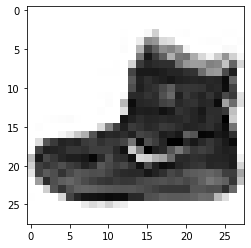

In [3]:
plt.imshow(X_train[0], cmap='Greys');

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

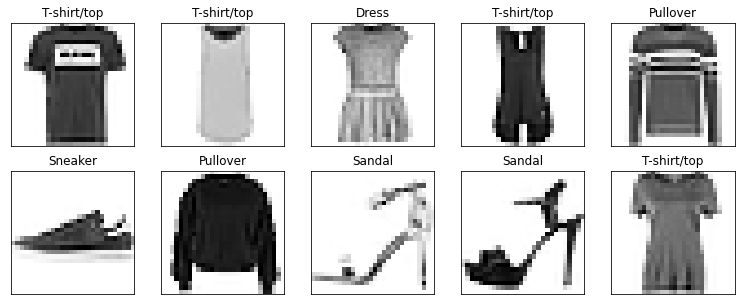

In [5]:
plt.figure(figsize=(13,5))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(X_train[i], cmap='Greys')
  plt.title(class_names[y_train[i]])
  plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
# X_train, X_test 정규화(0~1) 및 이미지 차원 변경 : 2차원 --> 1차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# One Hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [10]:
model = Sequential([
        Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
        Conv2D(64, (3,3),padding='same', activation = 'relu'),
        MaxPooling2D(),     # MaxPooling2D(pool_size=(2,2))
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.25),
        Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                        

In [11]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [12]:
model_path = 'best_fashion_mnist_cnn_v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
es = EarlyStopping(patience = 10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc,es]
)

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.4468 - accuracy: 0.8403
Epoch 1: val_loss improved from inf to 0.30092, saving model to best_fashion_mnist_cnn_v2.h5
240/240 [==============================] - 15s 18ms/step - loss: 0.4460 - accuracy: 0.8405 - val_loss: 0.3009 - val_accuracy: 0.8904
Epoch 2/100
237/240 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.8999
Epoch 2: val_loss improved from 0.30092 to 0.26813, saving model to best_fashion_mnist_cnn_v2.h5
240/240 [==============================] - 5s 19ms/step - loss: 0.2773 - accuracy: 0.8998 - val_loss: 0.2681 - val_accuracy: 0.9003
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9177
Epoch 3: val_loss improved from 0.26813 to 0.22731, saving model to best_fashion_mnist_cnn_v2.h5
240/240 [==============================] - 4s 19ms/step - loss: 0.2220 - accuracy: 0.9177 - val_loss: 0.2273 - val_accuracy: 0.9152
Epoch 4/100
238/240 [====

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9242


[0.2245780974626541, 0.9241999983787537]

- 학습과정 시각화

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

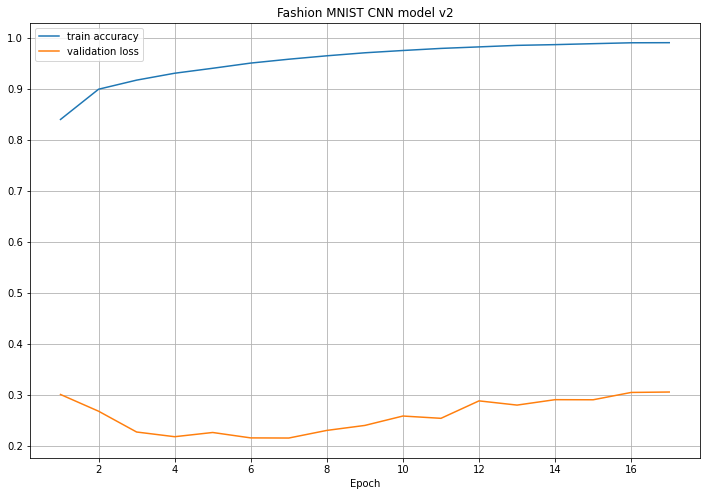

In [17]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train accuracy')
plt.plot(xs,y_vloss, label = 'validation loss')
plt.legend(),plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v2')
plt.show()